In [1]:
import pandas as pd
import numpy as np


1.将下面的字典创建为Dataframe

In [10]:
data = {"grammer":["Python","C","Ruby",np.nan,"Java","JavaScript","Python"],
            "score":[1,2,np.nan,4,5,6,10]}


In [11]:
df = pd.DataFrame(data)

In [12]:
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Ruby,NaN
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


2.提取有字符串python的行

In [14]:
df[df['grammer']=="Python"] # 法1

,grammer,score
0,Python,1.0
6,Python,10.0


In [16]:
result = df['grammer'].str.contains("Python")  # 转换成字符串 法2
result.fillna(value=False, inplace = True)  # 做一个df来放它
df[result]

,grammer,score
0,Python,1.0
6,Python,10.0


3.输出df的所有列名

In [17]:
print(df.columns)

Index(['grammer', 'score'], dtype='object')


4.修改列二名为'popularity'

In [19]:
df.rename(columns = {"score":"popularity"}, inplace = True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,NaN
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


5.统计grammer列中每种编程语言出现次数

In [20]:
df["grammer"].value_counts()

Python        2
Ruby          1
Java          1
JavaScript    1
C             1
Name: grammer, dtype: int64

6.将空值用上下值的平均值填充

In [23]:
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())  # this word means insert
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,3.0
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


7.提取popularity列中值大于3的行

In [24]:
df[df["popularity"]>3]

,grammer,popularity
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


8.按照grammer列进行去除重复值

In [25]:
df.drop_duplicates(["grammer"])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,3.0
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0


9.计算popularity列平均值

In [26]:
df["popularity"].mean()

4.428571428571429

10.将grammer转换为list

In [27]:
df["grammer"].to_list()

['Python', 'C', 'Ruby', nan, 'Java', 'JavaScript', 'Python']

11.将DataFrame保存为EXCEL

In [28]:
df.to_excel("test.xlsx") # 已经出现在同一个文件夹下

12.查看数据行列数

In [29]:
df.shape  # 7行2列

(7, 2)

13.提取popularity列值大于3小于等于7的行

In [30]:
df[(df["popularity"]>3)&(df["popularity"]<=7)]

,grammer,popularity
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0


In [31]:
df["popularity"]>3   # 这段代码是为了说明一层df做判断就是判断T or F，两层df就是把判断为真的表格部分进行抽取

0    False
1    False
2    False
3     True
4     True
5     True
6     True
Name: popularity, dtype: bool

14.交换两列位置

In [32]:
# 方法1
cols = df.columns[[1,0]]   
df = df[cols]
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


In [34]:
# 方法2
tmp = df['popularity']
df.drop(labels = ['popularity'], axis = 1, inplace = True)  # 删除第二列
df.insert(0, 'popularity', tmp) # 在第一列前面插入第一列
df

y:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


15.提取popularity列最大值所在行

In [35]:
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
6,10.0,Python


16.查看最后5行数据

In [36]:
df.tail(5)

,popularity,grammer
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


17.删除最后一行数据

In [37]:
df.drop([len(df)-1], inplace=True)    # len(df)就是行数
df

y:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript


18.添加一行数据['Perl',6.6]

In [47]:
row = {'grammer':'Perl','popularity':6.6}    # 字典用大括弧
df = df.append(row, ignore_index = True) #忽略原来的索引
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,6.6,Perl


19.对数据按照'popularity'列值的大小进行排序

In [49]:
df.sort_values("popularity", inplace = True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,6.6,Perl


20.统计grammer列每个字符串的长度

In [50]:
df["grammer"] = df["grammer"].fillna("R")  # 因为df里面有NaN无法统计长度，所以随便补了一个值
df["len_str"] = df["grammer"].map(lambda x:len(x)) # 新建了一列来记录字符串长度 lambda 是一个特殊函数
# map是用于映射的函数，可以将某段数据映射到其他的地方；也有批量应用 lambda 的功效
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Ruby,4
3,4.0,R,1
4,5.0,Java,4
5,6.0,JavaScript,10
6,6.6,Perl,4


21.读取本地EXCEL\CSV\html数据

In [55]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") # 大部分类型的文件都能read，read_excel也可以
# csv 在外面叫做 Microsoft excel 逗号分隔文件 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


22.查看数据前五行

In [56]:
df.head()  # df.read(100) 查看前100行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


23.将Fare列数据转换为最大值最小值的平均值 (这题老师的答案报错，说是int不能split，估计是有点问题)

In [ ]:
import re      # 正则表达式
def func(df):
    lst = df['Fare'].split('-')
    smin = int(lst[0].strip('k'))
    smax = int(lst[1].strip('k'))
    df['Fare'] = int((smin+smax)/2*1000)
    return df
df = df.apply(func, axis=1)     # apply是用来apply function的
df

24.将数据根据性别分组并计算平均的各种数值

In [59]:
print(df.groupby('Sex').mean())

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


24 举一反三：将数据根据兄弟姐妹数量分组并计算平均的各种数值

In [60]:
print(df.groupby('SibSp').mean())
# 兄弟姐妹少的死的少、舱室好、人更老

       PassengerId  Survived    Pclass        Age     Parch       Fare
SibSp                                                                 
0       455.370066  0.345395  2.351974  31.397558  0.185855  25.692028
1       439.727273  0.535885  2.057416  30.089727  0.655502  44.147370
2       412.428571  0.464286  2.357143  22.620000  0.642857  51.753718
3       321.562500  0.250000  2.562500  13.916667  1.312500  68.908862
4       381.611111  0.166667  3.000000   7.055556  1.500000  31.855556
5       336.800000  0.000000  3.000000  10.200000  2.000000  46.900000
8       481.714286  0.000000  3.000000        NaN  2.000000  69.550000


25.将create Time列时间转换为月-日

In [ ]:
for i in range(len(df)):
    df.ix[i,0] = df.ix[i,0].to_pydatetime().strftime("%m-%d")  # %y-%m-%d
df.head
 
# ix 方法可能因为版本问题失效，ix 是专门用于表格切片的函数

26.查看索引、数据类型和内存信息

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


27.查看数值型列的汇总统计

In [63]:
df.describe()    # std 是方差

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


28.新增一列根据Age将数据分为四组

In [72]:
bins = [0, 18, 30, 60, 80]
group_names = ['未成年','壮年','中年','老年']
df['category'] = pd.cut(df['Age'], bins, labels = group_names)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,壮年
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,中年
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,壮年
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,中年
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,中年
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,中年
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,未成年
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,壮年
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,未成年


28之举一反三：将12与7换位子

In [74]:
cols = df.columns[[0,1,2,3,4,5,6,12,8,9,10,11,7]]
df = df[cols]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,category,Ticket,Fare,Cabin,Embarked,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,壮年,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,中年,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,壮年,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,中年,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,中年,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,壮年,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,壮年,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,NaN,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,壮年,111369,30.0000,C148,C,0


29.按照Fare对数据降序排序

In [75]:
df.sort_values('Fare', ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,category,Ticket,Fare,Cabin,Embarked,Parch
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,中年,PC 17755,512.3292,NaN,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,中年,PC 17755,512.3292,B101,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,中年,PC 17755,512.3292,B51 B53 B55,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,壮年,19950,263.0000,C23 C25 C27,S,2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,壮年,19950,263.0000,C23 C25 C27,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,NaN,112052,0.0000,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,NaN,239853,0.0000,NaN,S,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,中年,19972,0.0000,NaN,S,0
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,NaN,239855,0.0000,NaN,S,0


30.取出第33行数据

In [76]:
df.loc[32]

PassengerId                          33
Survived                              1
Pclass                                3
Name           Glynn, Miss. Mary Agatha
Sex                              female
Age                                 NaN
SibSp                                 0
category                            NaN
Ticket                           335677
Fare                               7.75
Cabin                               NaN
Embarked                              Q
Parch                                 0
Name: 32, dtype: object

31.计算Fare列的中位数

In [77]:
np.median(df['Fare'])

14.4542

32.绘制船票频率和年龄的分布直方图

<AxesSubplot:ylabel='Frequency'>

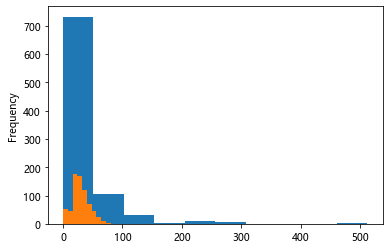

In [82]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
df.Fare.plot(kind = 'hist')
df.Age.plot(kind = 'hist')  # the orange one

33.绘制船票和年龄的密度曲线

<AxesSubplot:ylabel='Density'>

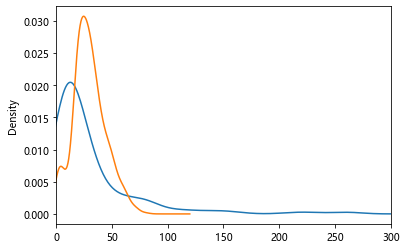

In [83]:
# 这图画起来要比上一张慢不少
df.Fare.plot(kind = 'kde', xlim = (0, 300))  # xlim可以规定范围
df.Age.plot(kind = 'kde')

34.删除最后一列categories

In [84]:
del df['category']

35.将 SibSp和 Cabin 两列合并为新一列 SibSp_Cabin， 中间分隔符用下划线

In [95]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") 

df['SibSp'] = df['SibSp'].map(lambda x:str(x))
df['SibSp_Cabin'] = df['SibSp'].str.cat(df['Cabin'], sep = '_')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0_B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0_C148


36.给某列的每行加上一个字符串，比如给Fare加上单位 Pounds

In [96]:
df['temp'] = 'pounds'
df['Fare'] = df['Fare'].astype('str')
#  df['Fare'] = df['Fare'].map(lambda x:str(x))  数据类型转换的两种方法
df['Fare'] = df['Fare'].str.cat(df['temp'], sep =" ")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin,temp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN,pounds
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85,pounds
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN,pounds
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123,pounds
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN,pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0 pounds,NaN,S,NaN,pounds
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0 pounds,B42,S,0_B42,pounds
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45 pounds,NaN,S,NaN,pounds
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148,pounds


In [99]:
del df['temp']   # 别忘了删掉暂时的 pounds 那一列
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN


37.计算Age最大值与最小值之差

In [100]:
df[['Age']].apply(lambda x:x.max()-x.min())

Age    79.58
dtype: float64

In [ ]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") 

38.将第一行和最后一行拼接

In [103]:
pd.concat([df[:1],df[-2:-1]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148


39.将第8行的数据添加到末尾

In [104]:
df.append(df.iloc[7])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0 pounds,B42,S,0_B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45 pounds,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75 pounds,NaN,Q,NaN


40.查看每一列的数据类型

In [105]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp           object
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
SibSp_Cabin     object
dtype: object

41.将Age列设置为索引

In [115]:
df.set_index('Age')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
27.0,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
19.0,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
NaN,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S


42.生成一个和df长度相同的随机数dataframe (或生成任何长度的随机数df)

In [116]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1,10,891)))  # randint(min,max,size,dtype = int)
df1

,0
0,7
1,5
2,5
3,4
4,2
...,...
886,5
887,1
888,7
889,9


43.将上一题生成的df与df合并

In [117]:
df = pd.concat([df,df1], axis = 1) 
# axis = 1 代表对纵轴操作，也就是第1轴；axis = 0 代表对横轴操作，也就是第0轴；

In [118]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5


44.生成新的一列new为Survived减去之前生成随机数列

In [119]:
df['new'] = df['Survived'] - df[0]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7,-7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,-4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,-4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,-3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5,-5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,7,-7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,9,-8


In [120]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") # 大部分类型的文件都能read，read_excel也可以

45.检查数据中是否有缺失值

In [121]:
df.isnull().values.any()

True

46.将Fare类型转换为整数

In [123]:
df['Fare'].astype(int)  # np.int64\np.int28 等是用来制定精度的

#int32即int的数值取值范围为“-2147483648”到“2147483647”；而int64的数值取值范围为“-9223372036854775808”到“9223372036854775808”
# astype是强制转化的函数，float都可以变成int

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

47.计算Fare大于200的次数

In [124]:
len(df[df['Fare']>200])

20

49.查看Cabin列共有几种

In [126]:
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
A31            1
D6             1
A34            1
B41            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [127]:
# 只看这个数据的话
df['Cabin'].nunique()

147

50.提取Fare和Age的余数大于5的最后3行

In [133]:
rowmod = df1.apply(lambda x: x['Fare'] / x['Age'], axis = 1)

# df1 = df[['Fare','Age']]
# df = df.apply(np.sum, axis = 1) 求和的话这样做 

res = df.iloc[np.where(rowmod > 5)[0][-3:], :]  # , : 不知道是干什么，好像不加也没影响

# indexed-based selection technique iloc() 专门用来切片

res

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


51.使用绝对路径读取本地excel数据

In [2]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(15088, 7)

52.查看数据前3行

In [4]:
data.head(3)

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
0,1,浙江大学(一流大学建设高校),1,人文科学试验班,201,662,3548.0
1,1,浙江大学(一流大学建设高校),2,社会科学试验班,188,667,2356.0
2,1,浙江大学(一流大学建设高校),3,社会科学试验班(竺可桢学院人文社科实验班、智能财务班),3,686,350.0


53.查看每列数据缺失值情况

In [5]:
data.isnull().sum()  # any()的结果是True

SchoolCode       0
SchoolName       0
MajorCode        0
Major            0
Planned          0
ScoreBand        0
Rank          1049
dtype: int64

54.提取Rank列含有空值的行

In [6]:
data[data['Rank'].isnull()]

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
14,3,浙江工业大学(入选“2011计划”高校)(省重点建设高校),1,健行学院实验班,40,639,NaN
1010,33,浙江树人学院（浙江树人大学）(民办),501,护理,285,495,NaN
1013,33,浙江树人学院（浙江树人大学）(民办),504,市场营销,50,495,NaN
1016,33,浙江树人学院（浙江树人大学）(民办),507,现代文秘(涉外),50,495,NaN
1105,41,浙江艺术职业学院,511,影视编导,45,495,NaN
...,...,...,...,...,...,...,...
14882,6408,宁夏理工学院(民办),16,机械工程,4,495,NaN
14886,6408,宁夏理工学院(民办),22,计算机类,7,495,NaN
14887,6408,宁夏理工学院(民办),23,土木工程,4,495,NaN
14899,6408,宁夏理工学院(民办),505,计算机应用技术,2,495,NaN


55.输出每列缺失值具体行数

In [7]:
for columname in data.columns:       # 注意columname 只有一个n
    if data[columname].count() != len(data):
        loc = data[columname][data[columname].isnull().values==True].index.tolist()  # .index.tolist()把他变成列表
        print('列名:"{}",第{}行位置有缺失值'.format(columname, loc))  # 两个{}就是等待key填入的，str.format()函数是在指定位置插入并格式化字符串的常用函数

列名:"Rank",第[14, 1010, 1013, 1016, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1113, 1114, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1250, 1252, 1254, 1255, 1257, 1262, 1274, 1275, 1278, 1279, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1304, 1306, 1308, 1310, 1312, 1313, 1314, 

56.删除所有存在缺失值的行

In [8]:
print(data.dropna(axis = 0, how = 'any', inplace = True)) # any如果换成all就是全部为空值删除

None


57.绘制折线图

In [9]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") # 大部分类型的文件都能read，read_excel也可以

<IPython.core.display.Javascript object>

<AxesSubplot:>

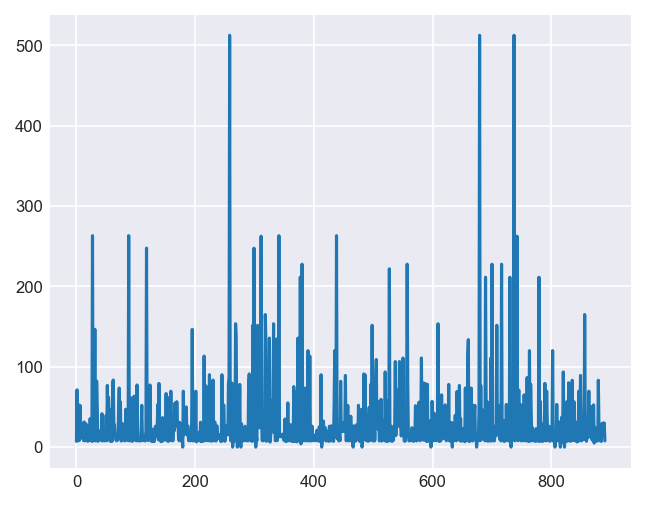

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')             # 风格
plt.rc('font', size = 8)                      # 字体
plt.rc('figure', figsize = (5,4), dpi = 150)  # 画质
df["Fare"].plot()

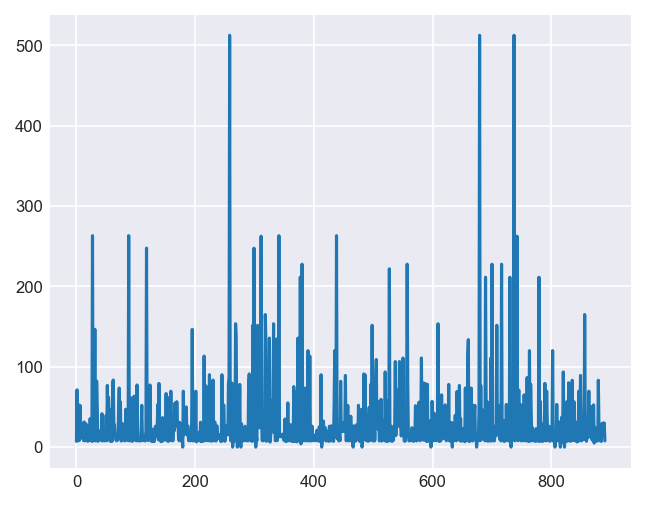

In [15]:
plt.plot(df["Fare"])  # 等同于 df["Fare"].plot()

58.同时绘制Fare和Age

<AxesSubplot:>

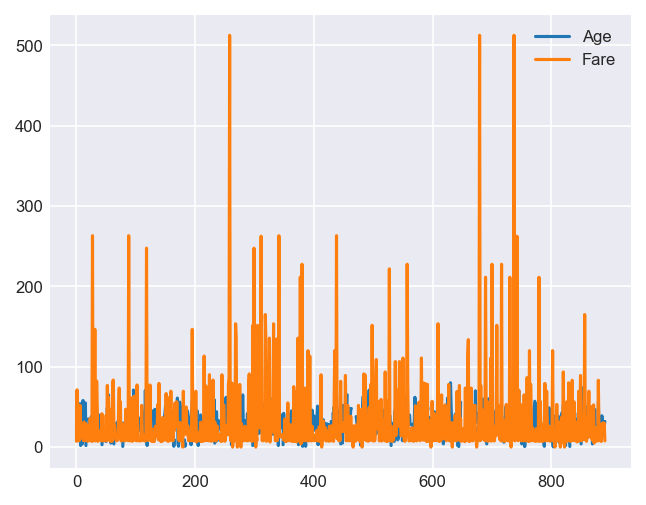

In [16]:
df[['Age','Fare']].plot()

59.绘制Fare直方图

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

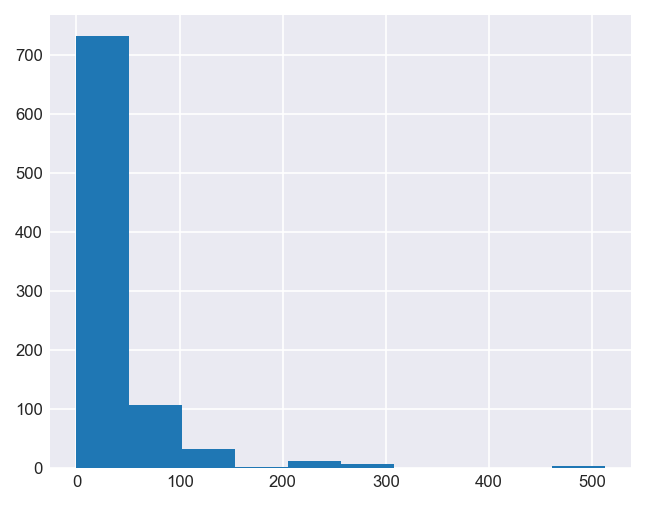

In [17]:
plt.hist(df['Fare'])

60.让直方图更精细（票价的频率）

<AxesSubplot:>

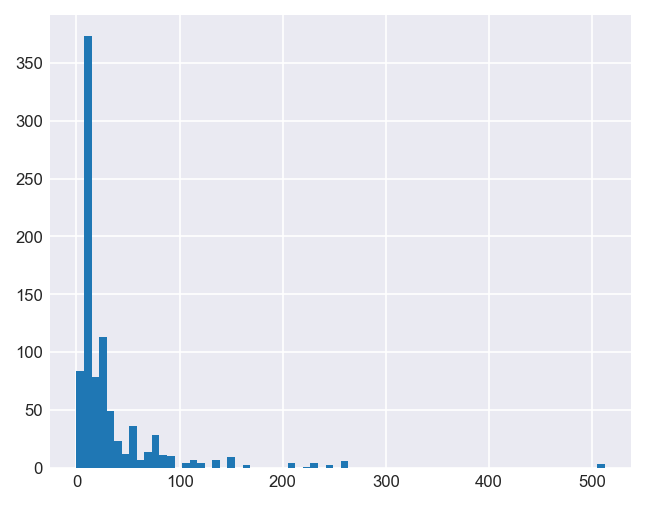

In [19]:
df['Fare'].hist(bins=70)

61.以df的列名创建一个dataframe

In [20]:
temp = pd.DataFrame(columns = df.columns.to_list())
temp

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


63.打印所有包含”中外合办“的专业

In [35]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")
data.head()

<IPython.core.display.Javascript object>

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
0,1,浙江大学(一流大学建设高校),1,人文科学试验班,201,662,3548.0
1,1,浙江大学(一流大学建设高校),2,社会科学试验班,188,667,2356.0
2,1,浙江大学(一流大学建设高校),3,社会科学试验班(竺可桢学院人文社科实验班、智能财务班),3,686,350.0
3,1,浙江大学(一流大学建设高校),4,理科试验班类,108,667,2397.0
4,1,浙江大学(一流大学建设高校),5,理科试验班(生命、环境、化学与地学),114,657,4733.0


In [55]:
a = data[data['Major'].str.contains("中外合作")]
a = a.sort_values('Rank', na_position = 'last', ascending = True)
a

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
5649,3109,上海财经大学(一流学科建设高校),6,金融学(中外合作办学)(银行与国际金融),4,670,1974.0
5646,3109,上海财经大学(一流学科建设高校),3,工商管理(中外合作办学)(会计学ACCA),5,667,2512.0
5652,3109,上海财经大学(一流学科建设高校),9,经济学(中外合作办学)(数量经济),5,659,4160.0
7448,3325,中国人民大学(苏州校区)(一流大学建设高校),4,人力资源管理(中外合作办学),1,653,6216.0
10338,4055,武汉大学(一流大学建设高校),15,建筑学(中外合作办学),2,650,7026.0
...,...,...,...,...,...,...,...
8394,3562,福州墨尔本理工职业学院(中外合作办学),507,国际经济与贸易(中外合作办学),7,495,NaN
10502,4070,武汉纺织大学,10,纺织工程(中外合作办学),10,495,NaN
12129,4420,广州民航职业技术学院,501,飞机机电设备维修(中外合作办学),18,495,NaN
12618,4529,北部湾大学,14,车辆工程(中外合作办学),2,495,NaN


64.重置a的行号，并查看含有宁诺的部分

In [56]:
a = a.reset_index()
b = a[a['SchoolName'].str.contains("宁波诺丁汉大学")]
b

,index,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
68,2082,182,宁波诺丁汉大学(中外合作办学),18,统计学(中外合作办学)(2+2),8,628,18353.0
78,2076,182,宁波诺丁汉大学(中外合作办学),12,数学与应用数学(中外合作办学)(2+2),7,625,20483.0
107,2074,182,宁波诺丁汉大学(中外合作办学),10,计算机科学与技术(中外合作办学)(2+2),14,620,24491.0
117,2068,182,宁波诺丁汉大学(中外合作办学),4,经济学(中外合作办学),20,618,26059.0
141,2083,182,宁波诺丁汉大学(中外合作办学),19,建筑学(中外合作办学),10,612,31045.0
156,2072,182,宁波诺丁汉大学(中外合作办学),8,英语(中外合作办学)(2+2),9,608,34547.0
157,2075,182,宁波诺丁汉大学(中外合作办学),11,数学与应用数学(中外合作办学),14,607,35429.0
161,2071,182,宁波诺丁汉大学(中外合作办学),7,英语(中外合作办学),12,605,37261.0
168,2073,182,宁波诺丁汉大学(中外合作办学),9,计算机科学与技术(中外合作办学),30,602,39880.0
181,2084,182,宁波诺丁汉大学(中外合作办学),20,化学(中外合作办学)(2+2),5,597,45389.0


65.删除所有rank为非数字的行

In [58]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")

<IPython.core.display.Javascript object>

In [60]:
k = []
for i in range(len(data)):
    if type(data.iloc[i:,7:])!=float:
        k.append(i)
data.drop(labels=k, inplace=True)
data

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank


上面这个应该是错的，把整个表都删了，不太懂iloc

67.计算前一天与后一天的差值（这里没有这种数据，就用分数线面人后面人的分数差值）

In [62]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")

<IPython.core.display.Javascript object>

In [67]:
data = data.sort_values("Rank")
data['Rank'].diff()

2467      NaN
2127      2.0
2129     22.0
2128     26.0
2134     26.0
         ... 
14882     NaN
14886     NaN
14887     NaN
14899     NaN
15080     NaN
Name: Rank, Length: 15088, dtype: float64

68.计算前一人后一人分数变化率

In [70]:
data['ScoreBand'].pct_change()

2467          NaN
2127    -0.006993
2129    -0.011268
2128    -0.004274
2134    -0.004292
           ...   
14882    0.000000
14886    0.000000
14887    0.000000
14899    0.000000
15080    0.189899
Name: ScoreBand, Length: 15088, dtype: float64

69.设置分数为索引

In [72]:
data = data.set_index('ScoreBand')

KeyError: "None of ['ScoreBand'] are in the columns"

In [73]:
data

,SchoolCode,SchoolName,MajorCode,Major,Planned,Rank
ScoreBand,,,,,,
715,1147,清华大学(一流大学建设高校),2,文科试验班类(通用基础类),1,2.0
710,1103,北京大学(一流大学建设高校),1,工商管理类,1,4.0
702,1103,北京大学(一流大学建设高校),5,理科试验班类(元培),4,26.0
699,1103,北京大学(一流大学建设高校),2,文科试验班类(通用类),6,52.0
696,1104,北京大学医学部(一流大学建设高校),4,口腔医学,1,78.0
...,...,...,...,...,...,...
495,6408,宁夏理工学院(民办),16,机械工程,4,NaN
495,6408,宁夏理工学院(民办),22,计算机类,7,NaN
495,6408,宁夏理工学院(民办),23,土木工程,4,NaN


70.以5个数据为数据滑动窗口，在这5个数据上取均值（排名）

In [75]:
data['Rank'].rolling(5).mean().head(50)

ScoreBand
715      NaN
710      NaN
702      NaN
699      NaN
696     32.4
696     49.4
695     66.2
695     79.6
693     96.6
692    110.6
692    125.6
692    140.8
691    156.6
691    165.4
690    176.0
690    184.0
690    193.6
688    209.8
688    224.4
687    240.8
687    262.4
687    285.4
687    301.0
686    317.0
686    327.8
686    334.4
686    339.0
685    352.4
685    369.2
685    386.8
684    418.0
683    453.2
683    480.6
683    507.4
682    540.6
682    561.0
682    578.2
682    595.4
681    625.4
680    648.6
680    675.8
679    711.6
679    757.0
679    786.4
679    815.8
678    841.8
678    866.4
678    889.4
677    925.6
676    976.4
Name: Rank, dtype: float64

72.以5个数据作为数据滑动窗口，计算总和

In [76]:
data['Rank'].rolling(5).sum()

ScoreBand
715      NaN
710      NaN
702      NaN
699      NaN
696    162.0
       ...  
495      NaN
495      NaN
495      NaN
495      NaN
589      NaN
Name: Rank, Length: 15088, dtype: float64

72.将Rank五人均线、20人均线与原始数据一起绘制

In [98]:
data.shape

(15088, 6)

<AxesSubplot:xlabel='ScoreBand'>

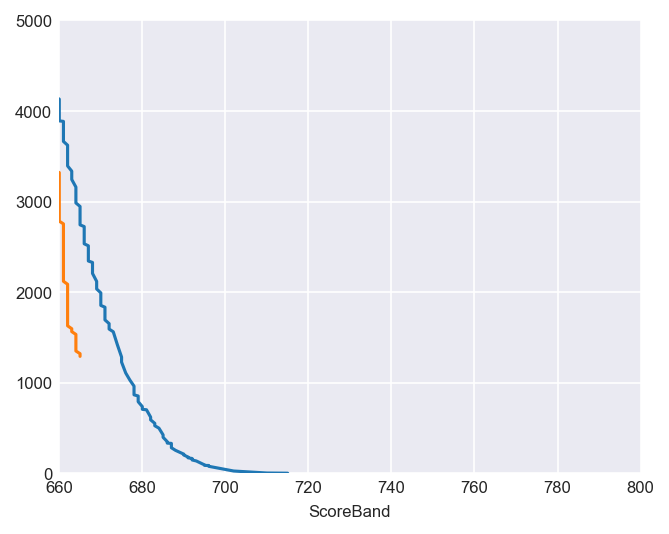

In [129]:
data['Rank'].plot(xlim=(660,800),ylim=(0,5000))
data['Rank'].rolling(100).mean().plot()
data['Rank'].rolling(1000).mean().plot()

<AxesSubplot:>

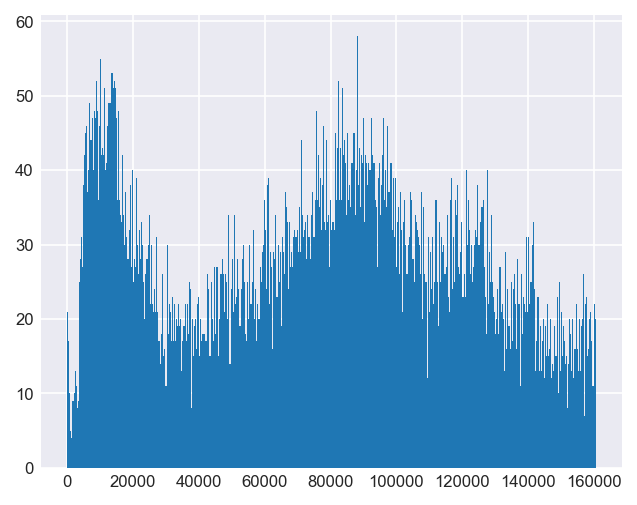

In [130]:
data['Rank'].hist(bins=500)

75.将数据往后移动5个单位

In [131]:
data.shift((5))

,SchoolCode,SchoolName,MajorCode,Major,Planned,Rank
ScoreBand,,,,,,
715,NaN,NaN,NaN,NaN,NaN,NaN
710,NaN,NaN,NaN,NaN,NaN,NaN
702,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN
696,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
495,6214.0,西北民族大学,6.0,计算机类,15.0,NaN
495,6214.0,西北民族大学,8.0,土木工程,6.0,NaN
495,6408.0,宁夏理工学院(民办),10.0,物联网工程,3.0,NaN


76.将数据向前移动5单位

In [132]:
data.shift((-5))

,SchoolCode,SchoolName,MajorCode,Major,Planned,Rank
ScoreBand,,,,,,
715,1103.0,北京大学(一流大学建设高校),6.0,理科试验班类(理科基础类),20.0,87.0
710,1147.0,清华大学(一流大学建设高校),6.0,临床医学类(含医学、化生类等),3.0,88.0
702,1147.0,清华大学(一流大学建设高校),1.0,理科试验班类(物理基础类),26.0,93.0
699,1104.0,北京大学医学部(一流大学建设高校),2.0,临床医学,5.0,137.0
696,1189.0,中国科学院大学(一流学科建设高校),2.0,人工智能,1.0,148.0
...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,NaN
495,NaN,NaN,NaN,NaN,NaN,NaN
495,NaN,NaN,NaN,NaN,NaN,NaN


77.使用expending函数计算移动窗口均值

In [133]:
data['Rank'].expanding(min_periods=1).mean()

ScoreBand
715        2.000000
710        3.000000
702       10.666667
699       21.000000
696       32.400000
           ...     
495    76563.591210
495    76563.591210
495    76563.591210
495    76563.591210
589    76563.591210
Name: Rank, Length: 15088, dtype: float64

78.绘制上一题的移动均值与原始数据折线图

<AxesSubplot:xlabel='ScoreBand'>

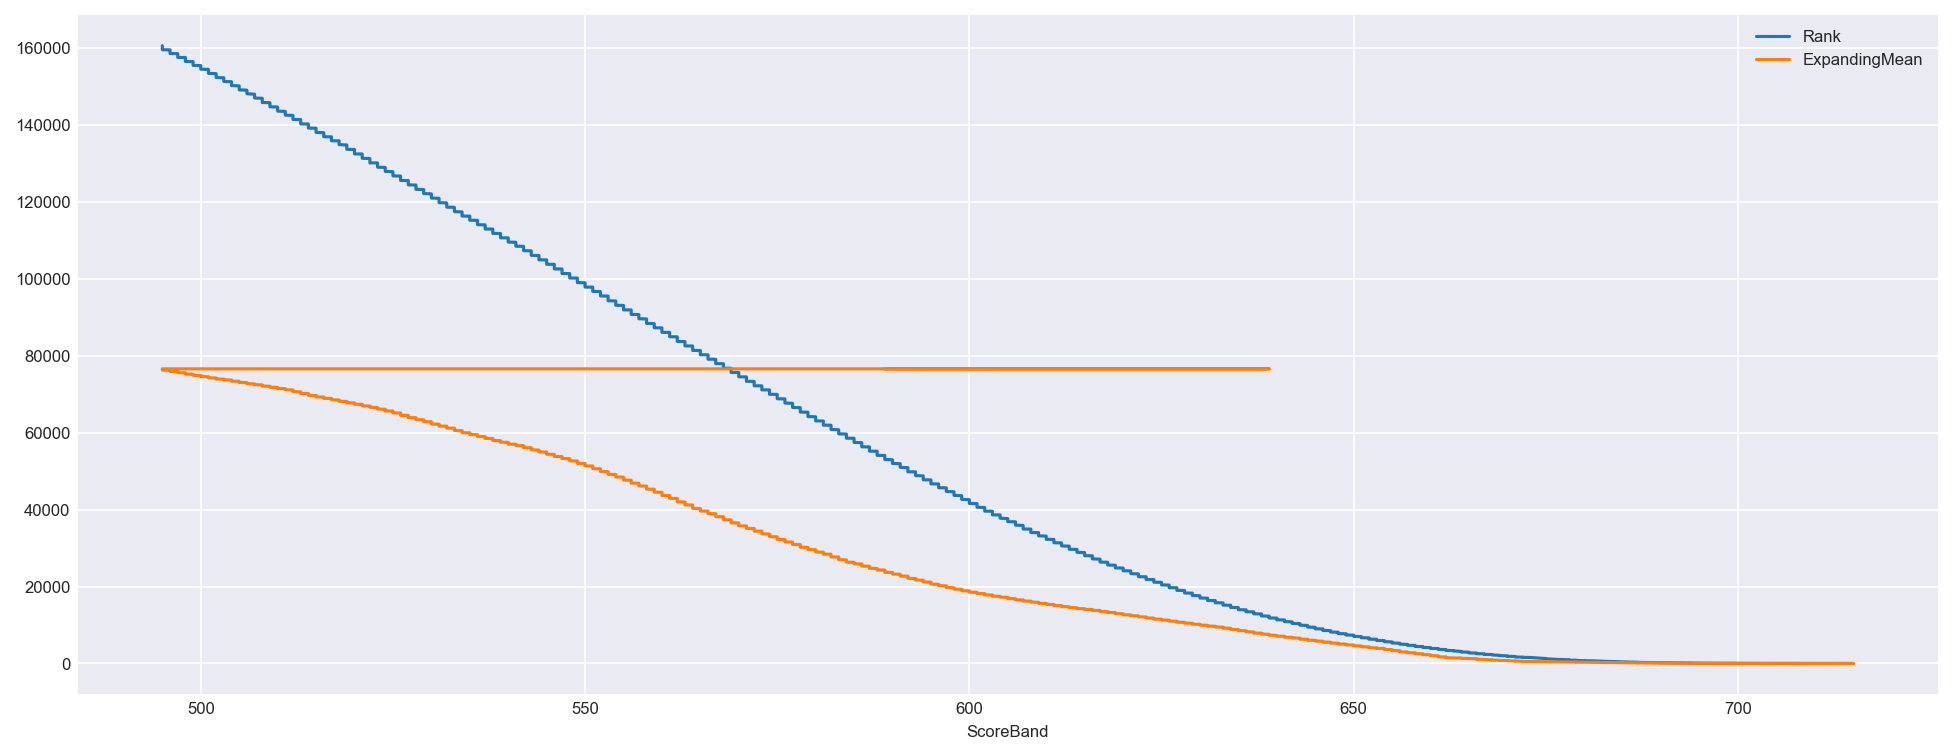

In [134]:
data['ExpandingMean'] = data['Rank'].expanding(min_periods=1).mean()
data[['Rank', 'ExpandingMean']].plot(figsize=(16,6))

79.计算布林指标（求出股价的标准差及其信赖区间，从而确定股价的波动范围及未来走势，利用波带显示股价的安全高低价位，因而也被称为布林带）

In [136]:
# 高回报值股票和比特币的数据
df = pd.read_csv('O:/Programming/Pandas100/portfolio_data.csv')
df.head()

<IPython.core.display.Javascript object>

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


<AxesSubplot:>

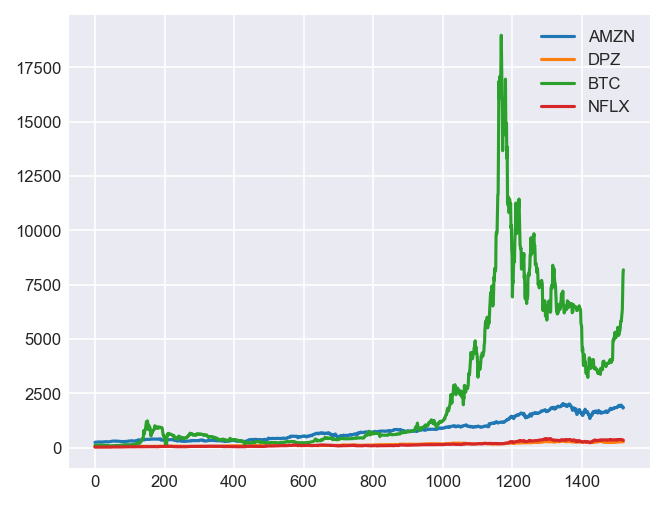

In [137]:
df.plot()

In [143]:
# 布林带
df.set_index('Date')
df['20 days rolling Close mean'] = df['BTC'].rolling(20).mean()
df['UpperBound'] = df['20 days rolling Close mean'] + 2*df['BTC'].rolling(20).std() # 20天标准差
df['LowerfBound'] = df['20 days rolling Close mean'] - 2*df['BTC'].rolling(20).std()

80.计算布林带并绘制

<AxesSubplot:>

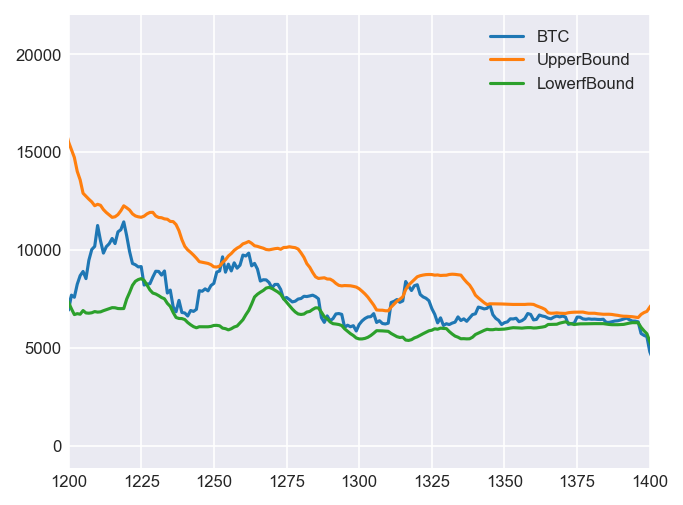

In [145]:
df[['BTC','UpperBound','LowerfBound']].plot(xlim=(1200,1400))

81.导入并查看Pandas与nmpy版本

In [146]:
import pandas as pd
import numpy as np
print(np.__version__)   
print(pd.__version__)   

1.22.4
1.2.4


82.从Numpy数组创建DataFrame

In [148]:
# 从numpy生成20个1-100的随机整数
temp = np.random.randint(1,100,20) 
df1 = pd.DataFrame(temp)
df1

,0
0,80
1,97
2,76
3,50
4,17
5,21
6,36
7,71
8,66
9,42


83.从Numpy数组创建DataFrame

In [150]:
temp = np.arange(0,100,5) # 步长为5
df2 = pd.DataFrame(temp)
df2

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


84.从Numpy数组创建DataFrame

In [152]:
temp = np.random.normal(0,1,20)  # 正态分部(均值，方差，size) (loc, scale, size)
df3 = pd.DataFrame(temp)  
df3

,0
0,0.092314
1,-0.662292
2,-0.636656
3,0.811918
4,-0.270150
5,1.050289
6,-0.731336
7,-0.463778
8,0.278032
9,1.061407


85.将df1,df2,df3按照行合并为新DataFrame

In [153]:
df = pd.concat([df1,df2,df3],axis = 0, ignore_index = True)
df

,0
0,80.000000
1,97.000000
2,76.000000
3,50.000000
4,17.000000
5,21.000000
6,36.000000
7,71.000000
8,66.000000
9,42.000000


85.将df1,df2,df3按照列合并为新DataFrame

In [154]:
df = pd.concat([df1,df2,df3],axis = 1, ignore_index = True)
df

,0,1,2
0,80,0,0.092314
1,97,5,-0.662292
2,76,10,-0.636656
3,50,15,0.811918
4,17,20,-0.270150
5,21,25,1.050289
6,36,30,-0.731336
7,71,35,-0.463778
8,66,40,0.278032
9,42,45,1.061407


87.查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值

In [156]:
df.describe()

,0,1,2
count,20.000000,20.000000,20.000000
mean,50.000000,47.500000,-0.088197
std,28.388285,29.580399,1.012344
min,1.000000,0.000000,-2.072570
25%,32.250000,23.750000,-0.643065
50%,50.000000,47.500000,-0.147626
75%,72.250000,71.250000,0.868206
max,97.000000,95.000000,1.775232


In [158]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")

In [159]:
data.describe()

,SchoolCode,MajorCode,Planned,ScoreBand,Rank
count,15088.000000,15088.000000,15088.000000,15088.000000,14039.000000
mean,3059.716066,67.137129,10.317206,566.700888,76563.591210
std,1769.570197,155.628172,23.711856,46.091152,43977.914737
min,1.000000,1.000000,1.000000,495.000000,2.000000
25%,1416.000000,5.000000,2.000000,531.000000,38359.500000
50%,3409.500000,11.000000,3.000000,562.000000,79966.000000
75%,4308.000000,23.000000,6.000000,599.000000,111391.500000
max,9034.000000,560.000000,533.000000,715.000000,160509.000000


更精准一点

In [160]:
print(np.percentile(df,q=[0,25,50,75,100]))

[-2.07256967  0.67844624 23.         64.25       97.        ]


88.修改列名

In [162]:
df.columns = ['randint1','randint2','randnormal']
df

,randint1,randint2,randnormal
0,80,0,0.092314
1,97,5,-0.662292
2,76,10,-0.636656
3,50,15,0.811918
4,17,20,-0.270150
5,21,25,1.050289
6,36,30,-0.731336
7,71,35,-0.463778
8,66,40,0.278032
9,42,45,1.061407


89.提取一列中在第二列出现的数字

In [164]:
df['randint1'][df['randint1'].isin(df['randint2'])]

0     80
3     50
10    50
12     5
13    70
19    80
Name: randint1, dtype: int32

90.提取第一列和第二列出现频率最高的三个数字

In [165]:
temp = df['randint1'].append(df['randint2'])
temp.value_counts().index[:3]

Int64Index([80, 50, 5], dtype='int64')

91.计算第一列数字前一个和后一个的差值

In [168]:
df['randint1'].diff().tolist()

[nan,
 17.0,
 -21.0,
 -26.0,
 -33.0,
 4.0,
 15.0,
 35.0,
 -5.0,
 -24.0,
 8.0,
 -2.0,
 -43.0,
 65.0,
 8.0,
 -77.0,
 40.0,
 -34.0,
 57.0,
 16.0]

93.将三个列的顺序颠倒

In [169]:
cols = df.columns[[2,0,1]]   
df = df[cols]
df

,randnormal,randint1,randint2
0,0.092314,80,0
1,-0.662292,97,5
2,-0.636656,76,10
3,0.811918,50,15
4,-0.270150,17,20
5,1.050289,21,25
6,-0.731336,36,30
7,-0.463778,71,35
8,0.278032,66,40
9,1.061407,42,45


94.提取第一列位置在1，10，15的数字

In [170]:
df['randint1'].take([1,10,15])

1     97
10    50
15     1
Name: randint1, dtype: int32

抛出异常的函数 raise （可以人为给出报错触发异常）

In [171]:
x = 10
if x > 5:
    raise Exception('x 不能大于 5。x 的值为: {}'.format(x))

Exception: x 不能大于 5。x 的值为: 10

95.查找第一列局部比较大的一些数（比周围大的数）???

In [178]:
temp = np.diff(np.sign(np.diff(df['randint1'])))
np.where(temp == -2)[0]

array([ 0,  6,  9, 13, 15], dtype=int64)

96.按行计算df均值

In [179]:
df[['randint1','randint2','randnormal']].mean(axis=1)

0     26.697438
1     33.779236
2     28.454448
3     21.937306
4     12.243283
5     15.683430
6     21.756221
7     35.178741
8     35.426011
9     29.353802
10    33.324966
11    34.164164
12    22.032185
13    44.473458
14    49.339687
15    24.642477
16    40.679023
17    30.172109
18    51.925077
19    58.148956
dtype: float64

98.将数据按照第三列值的大小降序排列

In [182]:
df.sort_values('randnormal',ascending = False, inplace = True) # inplace = True 是否改变数据
df

,randnormal,randint1,randint2
18,1.775232,64,90
12,1.096555,5,60
9,1.061407,42,45
5,1.050289,21,25
16,1.037069,41,80
3,0.811918,50,15
8,0.278032,66,40
0,0.092314,80,0
14,0.019061,78,70
10,-0.025102,50,50


99.将一列大于50的数字修改为高

In [183]:
df.randint1[df['randint1']>50] = '高'
df

<ipython-input-183-91ce28236ed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.randint1[df['randint1']>50] = '高'


,randnormal,randint1,randint2
18,1.775232,高,90
12,1.096555,5,60
9,1.061407,42,45
5,1.050289,21,25
16,1.037069,41,80
3,0.811918,50,15
8,0.278032,高,40
0,0.092314,高,0
14,0.019061,高,70
10,-0.025102,50,50


100.计算第一列和第三列之间的欧氏距离

In [186]:
np.linalg.norm(df['randnormal']-df['randint2'])

248.9852551823442

101.从CSV文件中读取制定数据

In [187]:
df = pd.read_csv("O:/Programming/Pandas100/portfolio_data.csv", encoding="gbk", usecols = ['BTC', 'AMZN'], nrows = 10)
# encoding 是不同的编码格式制定

In [188]:
df

,AMZN,BTC
0,248.229996,106.250000
1,252.550003,98.099998
2,258.049988,112.900002
3,255.720001,109.599998
4,257.730011,113.199997
5,258.679993,112.800003
6,260.160004,117.699997
7,263.630005,115.639999
8,264.510010,111.400002
9,268.329987,114.220001


102.从csv文件中读取制定数据

In [189]:
df = pd.read_csv("O:/Programming/Pandas100/portfolio_data.csv", converters={"BTC": lambda x: '高' if float(x) > 10000 else '低'})

In [191]:
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,低,30.415714
1,5/2/2013,252.550003,51.987320,低,30.641428
2,5/3/2013,258.049988,52.446388,低,30.492857
3,5/6/2013,255.720001,53.205257,低,30.098572
4,5/7/2013,257.730011,54.151505,低,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,低,364.369995
1516,5/9/2019,1899.869995,282.160004,低,362.750000
1517,5/10/2019,1889.979980,278.369995,低,361.040009
1518,5/13/2019,1822.680054,273.880005,低,345.260010


103.从上一题中，对NFLX股价每隔20行进行一次抽样

In [192]:
df.iloc[::20,:]['NFLX']

0        30.415714
20       31.808571
40       30.709999
60       35.187141
80       39.765713
           ...    
1420    266.769989
1440    339.100006
1460    361.920013
1480    358.779999
1500    359.459991
Name: NFLX, Length: 76, dtype: float64

104.将数据使用科学计数法

In [193]:
df = pd.DataFrame(np.random.random(10)**10, columns = ['data'])
df

,data
0,1.926457e-07
1,3.668723e-13
2,4.641162e-01
3,9.959888e-03
4,8.126065e-01
5,3.693316e-01
6,4.393613e-04
7,1.520649e-05
8,1.075840e-03
9,9.146324e-07


105.将上一题的数据转化为百分数

In [195]:
df.style.format({'data':'{0:2%}'.format})

,data
0,0.000019%
1,0.000000%
2,46.411618%
3,0.995989%
4,81.260655%
5,36.933157%
6,0.043936%
7,0.001521%
8,0.107584%
9,0.000091%


数据转化为千分数（n位小数点）

In [196]:
df.round(3)

,data
0,0.000
1,0.000
2,0.464
3,0.010
4,0.813
5,0.369
6,0.000
7,0.000
8,0.001
9,0.000


106.查找上一题数据中第3大值的行号

In [198]:
df['data'].argsort()[::-1][7]  # 因为有10个数据

5

107.反转df的行

In [199]:
df.iloc[::-1,:]

,data
9,9.146324e-07
8,1.075840e-03
7,1.520649e-05
6,4.393613e-04
5,3.693316e-01
4,8.126065e-01
3,9.959888e-03
2,4.641162e-01
1,3.668723e-13
0,1.926457e-07


109.按照多列数据进行合并【超级有用】

In [201]:
pd.merge(df1,df2,on = [0])
# 相同数据的行就都合并了[0]是列名

,0
0,80
1,80
2,50
3,50
4,5
5,70


In [202]:
pd.merge(df1,df2,how='right',on = [0])

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


110.再次读取数据并显示所有的列(有的时候列太多无法显示就会要这样)

In [207]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv")
pd.set_option('display.expand_frame_repr', False)
# pd.option_context('display.max_rows', None, 'display.max_columns', None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


111.查找SibSp与Pclass值相等的行号

In [219]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv")

In [220]:
np.where(df.SibSp==df.Pclass)

(array([  1,   3,   7,  24,  31,  34,  35,  52,  62,  63,  85,  92, 120,
        137, 151, 176, 183, 215, 224, 229, 230, 248, 262, 275, 291, 297,
        305, 307, 319, 334, 336, 366, 370, 374, 375, 383, 390, 393, 409,
        412, 434, 435, 437, 438, 453, 457, 484, 485, 486, 496, 498, 505,
        513, 529, 544, 556, 558, 577, 581, 587, 591, 599, 600, 618, 621,
        634, 642, 645, 655, 665, 669, 671, 690, 698, 700, 712, 724, 741,
        745, 748, 763, 765, 781, 802, 809, 819, 820, 835, 849, 856, 871],
       dtype=int64),)

113.将Fare开根号

In [228]:
df[['Fare']].apply(np.sqrt)

,Fare
0,2.692582
1,8.442944
2,2.815138
3,7.286975
4,2.837252
...,...
886,3.605551
887,5.477226
888,4.842520
889,5.477226


116.提取以新疆开头的大学专业

In [229]:
df = pd.read_excel('O:/Programming/Pandas100/Scores2021.xlsx')

In [230]:
df[df['SchoolName'].str.startswith('新疆')]

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
14921,6502,新疆财经大学,1,金融科技,2,543,106048.0
14922,6502,新疆财经大学,2,金融工程,5,525,127586.0
14923,6502,新疆财经大学,3,保险学,2,545,104412.0
14924,6502,新疆财经大学,4,数据科学与大数据技术,5,522,131043.0
14925,6502,新疆财经大学,5,工商管理,2,551,96753.0
14926,6502,新疆财经大学,6,会计学,5,556,91012.0
14927,6502,新疆财经大学,7,财务管理,2,551,97105.0
14928,6502,新疆财经大学,8,审计学,2,554,93965.0
14929,6502,新疆财经大学,9,经济学,8,549,99470.0
14930,6502,新疆财经大学,10,财政学,3,550,98287.0


117.制作数据透视表

In [233]:
pd.pivot_table(df, values = ['Planned', 'Rank'], index = 'ScoreBand')

,Planned,Rank
ScoreBand,,
495,24.115245,160022.400000
496,20.716667,158925.766667
497,28.250000,157924.980769
498,11.538462,156898.230769
499,15.490909,155858.072727
500,11.444444,154810.259259
501,12.600000,153768.036364
502,12.833333,152734.759259
503,8.894737,151644.710526


118.同时对ScoreBand、Rank两列进行计算

In [235]:
df[['ScoreBand', 'Rank']].agg([np.sum, np.mean, np.min, np.std])

,ScoreBand,Rank
sum,8.550383e+06,1.074876e+09
mean,5.667009e+02,7.656359e+04
amin,4.950000e+02,2.000000e+00
std,4.609115e+01,4.397791e+04


120.计算并提取平均位次最大的20所学校

In [243]:
df[['SchoolName', 'Rank']].groupby(by = 'SchoolName').mean().sort_values('Rank', ascending = False).head(20)

,Rank
SchoolName,
南京城市职业学院,160365.0
珠海艺术职业学院(民办),160288.0
焦作师范高等专科学校,159980.0
郑州铁路职业技术学院,159826.0
保险职业学院,159760.0
浙江建设职业技术学院,159635.0
焦作大学,159406.0
仙桃职业学院,158895.0
洛阳职业技术学院,158793.0


121.计算并提取平均位次最小的20所学校

In [245]:
df[['SchoolName', 'Rank']].groupby(by = 'SchoolName').mean().sort_values('Rank', ascending = True).head(20)

,Rank
SchoolName,
北京大学(一流大学建设高校),42.250000
清华大学(一流大学建设高校),61.000000
中国科学院大学(一流学科建设高校),156.000000
北京大学医学部(一流大学建设高校),182.714286
复旦大学(一流大学建设高校),229.333333
上海交通大学(一流大学建设高校),308.000000
复旦大学医学院(一流大学建设高校),343.000000
中国人民大学(一流大学建设高校),499.583333
上海交通大学医学院(一流大学建设高校),579.333333
